# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

# Exponential Smoothing methods

#### Exponential smoothing methods consist of flattening time series data

#### Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations

#### Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).

#### One or more parameters control how fast the weights decay.

#### These parameters have values between 0 and 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams

In [5]:
# Read the data set
df = pd.read_csv('AirPassenger.csv',parse_dates=True,index_col='Year-Month')
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


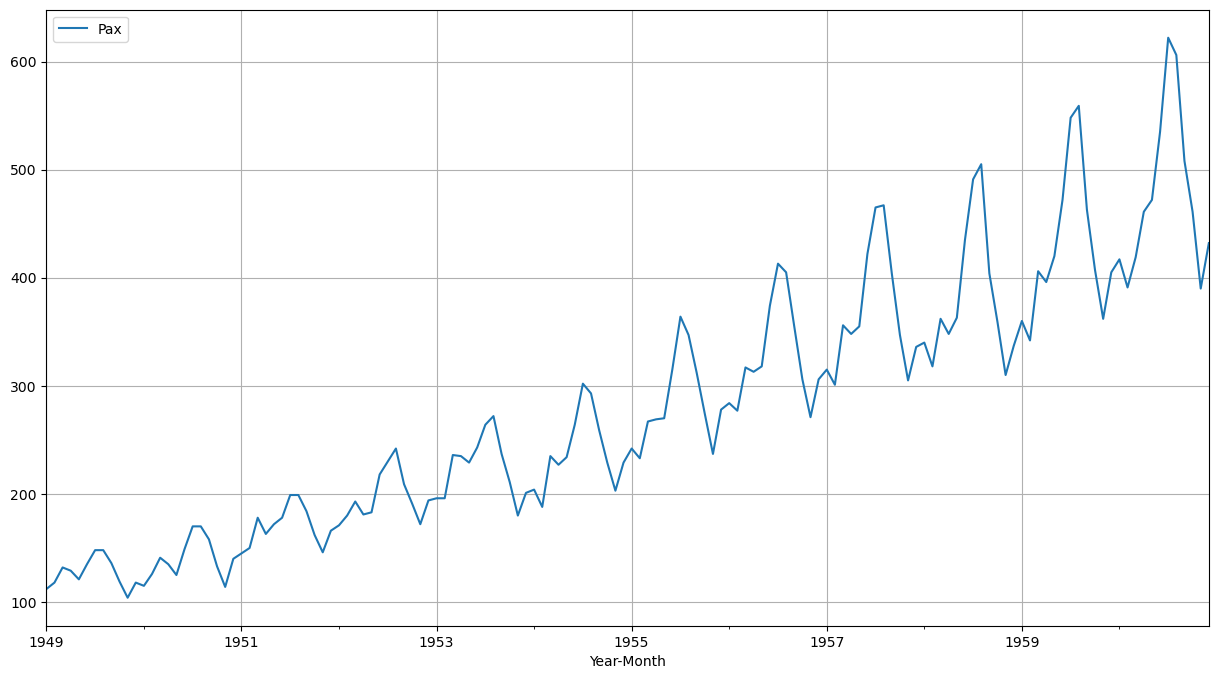

In [10]:
rcParams['figure.figsize'] = 15,8
df.plot()
plt.grid()

# Split the data into training and test set. The data from 1957 should be in in training set

In [18]:
train = df[df.index < '1957']
test = df[df.index >= '1957']

In [21]:
# Printing the Air Passenger Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-08-01,405
1956-09-01,355
1956-10-01,306


Test Data


,Pax
Year-Month,
1957-01-01,315
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404


# SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).
This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

Ft+1=αYt+(1−α)Ft

Parameter α
 is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [23]:
# Create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [24]:
# Fitting the Simple Exponential Model and askting python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [27]:
# Lets check the parameters
model_SES_autofit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.99992449435713,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here python has optimized the smoothing level to almost 1.

In [30]:
## Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1957-01-01    305.999999
1957-02-01    305.999999
1957-03-01    305.999999
1957-04-01    305.999999
1957-05-01    305.999999
1957-06-01    305.999999
1957-07-01    305.999999
1957-08-01    305.999999
1957-09-01    305.999999
1957-10-01    305.999999
1957-11-01    305.999999
1957-12-01    305.999999
1958-01-01    305.999999
1958-02-01    305.999999
1958-03-01    305.999999
1958-04-01    305.999999
1958-05-01    305.999999
1958-06-01    305.999999
1958-07-01    305.999999
1958-08-01    305.999999
1958-09-01    305.999999
1958-10-01    305.999999
1958-11-01    305.999999
1958-12-01    305.999999
1959-01-01    305.999999
1959-02-01    305.999999
1959-03-01    305.999999
1959-04-01    305.999999
1959-05-01    305.999999
1959-06-01    305.999999
1959-07-01    305.999999
1959-08-01    305.999999
1959-09-01    305.999999
1959-10-01    305.999999
1959-11-01    305.999999
1959-12-01    305.999999
1960-01-01    305.999999
1960-02-01    305.999999
1960-03-01    305.999999
1960-04-01    305.999999


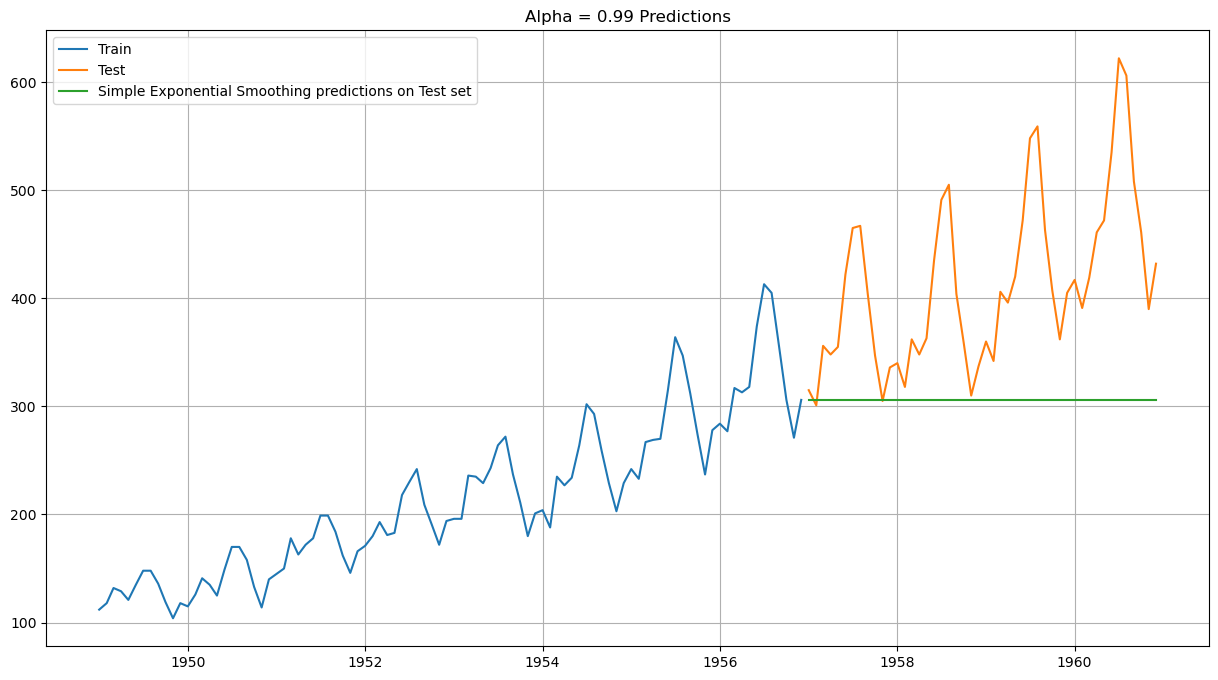

In [38]:
## Plotting the training data, test data and the forecasting value
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SES_predict,label='Simple Exponential Smoothing predictions on Test set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');


In [47]:
## RMSE value
rmse= mean_squared_error(test.values,SES_predict.values,squared=False)
rmse

132.60993908995977

In [52]:
resultsDf= pd.DataFrame({'Test RMSE':rmse},index=['Alpha = 0.99, SES'])
resultsDf

,Test RMSE
"Alpha = 0.99, SES",132.609939


# Holt - ETS(A, A, N) - Holt's linear method with additive errors

# Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

# **Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [54]:
## Initializing the double exponential smoothing method
model_DES = Holt(train,initialization_method='estimated')

In [55]:
# fitting the model
model_DES = model_DES.fit()
model_DES

In [57]:
model_DES.params

{'smoothing_level': 0.9950081698782743,
 'smoothing_trend': 0.0001328743480157209,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 118.38177758676434,
 'initial_trend': 1.9567117082805132,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [58]:
## Using fitted model on the training set to forecast on the test set
DES_predict = model_DES.forecast(steps=len(test))
DES_predict

1957-01-01    307.792618
1957-02-01    309.749277
1957-03-01    311.705936
1957-04-01    313.662595
1957-05-01    315.619254
1957-06-01    317.575913
1957-07-01    319.532572
1957-08-01    321.489231
1957-09-01    323.445891
1957-10-01    325.402550
1957-11-01    327.359209
1957-12-01    329.315868
1958-01-01    331.272527
1958-02-01    333.229186
1958-03-01    335.185845
1958-04-01    337.142504
1958-05-01    339.099163
1958-06-01    341.055822
1958-07-01    343.012481
1958-08-01    344.969140
1958-09-01    346.925800
1958-10-01    348.882459
1958-11-01    350.839118
1958-12-01    352.795777
1959-01-01    354.752436
1959-02-01    356.709095
1959-03-01    358.665754
1959-04-01    360.622413
1959-05-01    362.579072
1959-06-01    364.535731
1959-07-01    366.492390
1959-08-01    368.449049
1959-09-01    370.405708
1959-10-01    372.362368
1959-11-01    374.319027
1959-12-01    376.275686
1960-01-01    378.232345
1960-02-01    380.189004
1960-03-01    382.145663
1960-04-01    384.102322


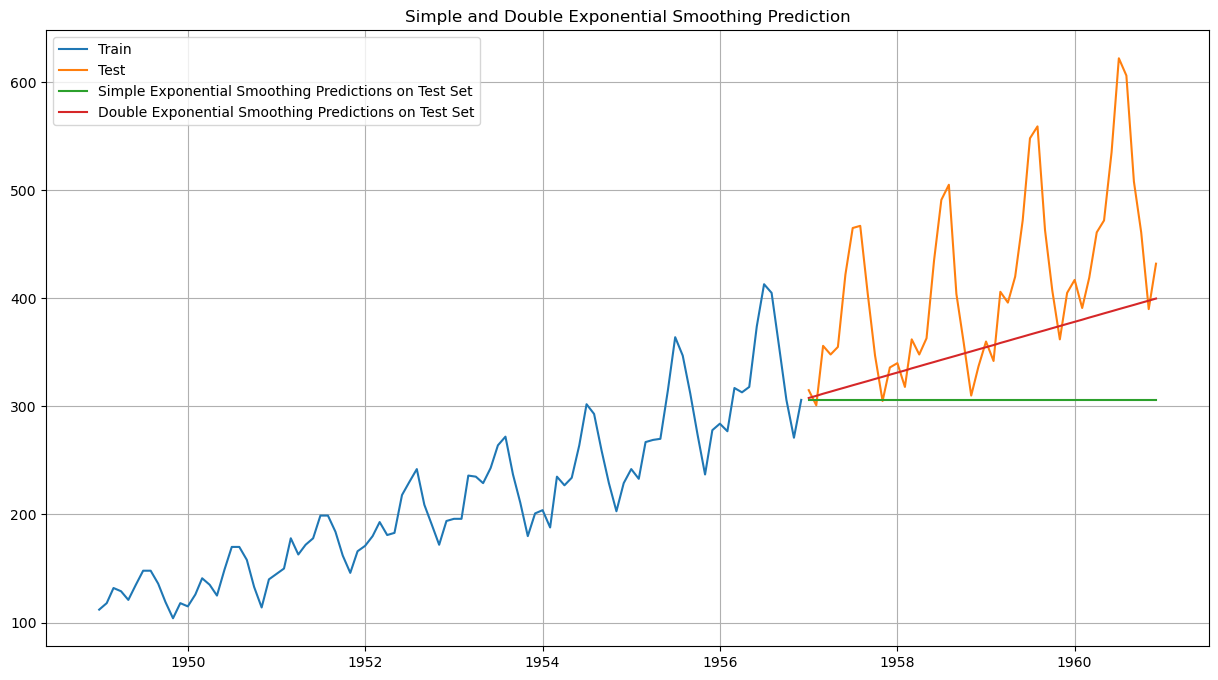

In [62]:
## Plotting the Training data, Test data and the forecasting values

plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SES_predict,label='Simple Exponential Smoothing Predictions on Test Set')
plt.plot(DES_predict,label='Double Exponential Smoothing Predictions on Test Set')
plt.grid()
plt.legend(loc='best')
plt.title('Simple and Double Exponential Smoothing Prediction');


We See that there is a Trend going upward but not seasonality in the Double Exponential Smoothing Forecast

In [63]:
## RMSE Value
rmse_DES = mean_squared_error(test,DES_predict,squared=False)
rmse_DES

89.3713834184578

In [80]:
resultsDf2 = pd.DataFrame({'Test RMSE' : rmse_DES},index=['Alpha = 1,Beta=0.01 DES'])
resultsDf2

,Test RMSE
"Alpha = 1,Beta=0.01 DES",89.371383


# Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [81]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES

In [82]:
## Fitting the model
model_TES = model_TES.fit()

In [83]:
model_TES.params ## Now we have all the values Alpha, Beta and Gamma with respective Level, Trend and Seasonality

{'smoothing_level': 0.254649925501571,
 'smoothing_trend': 2.543645281842299e-09,
 'smoothing_seasonal': 0.7453500675810899,
 'damping_trend': nan,
 'initial_level': 118.76876634027332,
 'initial_trend': 2.332846526461995,
 'initial_seasons': array([ -9.10328578,  -3.50557166,   8.96775554,   3.69507357,
         -5.07008289,   9.02879443,  21.24162791,  18.81622569,
          4.68594301, -14.11624487, -28.55672933, -11.9496582 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [84]:
## Using fitted model on the training set to forecast on the test set
TES_predict = model_TES.forecast(steps=len(test))
TES_predict

1957-01-01    319.235309
1957-02-01    311.528442
1957-03-01    350.278768
1957-04-01    346.985086
1957-05-01    351.845152
1957-06-01    403.925810
1957-07-01    440.566873
1957-08-01    427.446506
1957-09-01    376.628192
1957-10-01    329.767552
1957-11-01    296.561354
1957-12-01    341.114880
1958-01-01    347.229468
1958-02-01    339.522600
1958-03-01    378.272926
1958-04-01    374.979245
1958-05-01    379.839310
1958-06-01    431.919968
1958-07-01    468.561032
1958-08-01    455.440664
1958-09-01    404.622351
1958-10-01    357.761710
1958-11-01    324.555512
1958-12-01    369.109038
1959-01-01    375.223626
1959-02-01    367.516759
1959-03-01    406.267084
1959-04-01    402.973403
1959-05-01    407.833468
1959-06-01    459.914127
1959-07-01    496.555190
1959-08-01    483.434822
1959-09-01    432.616509
1959-10-01    385.755869
1959-11-01    352.549670
1959-12-01    397.103196
1960-01-01    403.217784
1960-02-01    395.510917
1960-03-01    434.261243
1960-04-01    430.967561


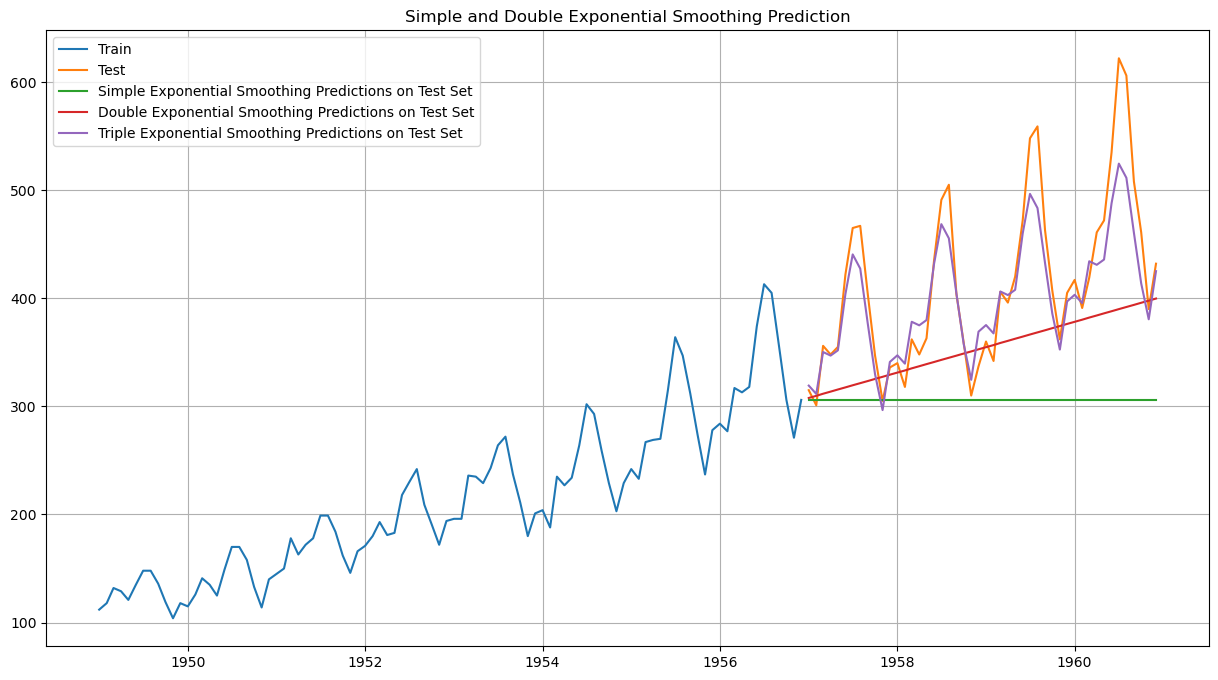

In [85]:
## Plotting the Training Data, Test DAta, and Forecast values

plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SES_predict,label='Simple Exponential Smoothing Predictions on Test Set')
plt.plot(DES_predict,label='Double Exponential Smoothing Predictions on Test Set')
plt.plot(TES_predict,label='Triple Exponential Smoothing Predictions on Test Set')
plt.grid()
plt.legend(loc='best')
plt.title('Simple and Double Exponential Smoothing Prediction');


In [86]:
## RMSE Value
rmse_TES = mean_squared_error(test,TES_predict,squared=False)
rmse_TES

31.899965746596287

In [87]:
resultsDf3 = pd.DataFrame({'Test RMSE':rmse_TES},index=['Alpha = 0.25, Beta = 2.5, Gamma = 0.74, TES'])
resultsDf3

,Test RMSE
"Alpha = 0.25, Beta = 2.5, Gamma = 0.74, TES",31.899966


In [88]:
Final_Result = pd.concat([resultsDf,resultsDf2,resultsDf3])


In [89]:
Final_Result

,Test RMSE
"Alpha = 0.99, SES",132.609939
"Alpha = 1,Beta=0.01 DES",89.371383
"Alpha = 0.25, Beta = 2.5, Gamma = 0.74, TES",31.899966


# Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Triple Exponential Smoothing with Multiplicative Seasonality

In [98]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
model_TES

In [99]:
model_TES = model_TES.fit()

In [101]:
model_TES.params

{'smoothing_level': 0.7412337757653918,
 'smoothing_trend': 1.710045341835665e-11,
 'smoothing_seasonal': 3.2533988320609825e-12,
 'damping_trend': nan,
 'initial_level': 104.85032051771273,
 'initial_trend': 1.9233908207691301,
 'initial_seasons': array([1.05993466, 1.03715827, 1.18885695, 1.14882013, 1.14127929,
        1.28752397, 1.42298956, 1.39260335, 1.22400702, 1.06334363,
        0.92424838, 1.04495077]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [102]:
# Forecasting using this model for the duration of the test set
TES_predict_mul = model_TES.forecast(steps=len(test))
TES_predict_mul

1957-01-01    312.898312
1957-02-01    308.169462
1957-03-01    355.530127
1957-04-01    345.766661
1957-05-01    345.692182
1957-06-01    392.465936
1957-07-01    436.495826
1957-08-01    429.853511
1957-09-01    380.167289
1957-10-01    332.311686
1957-11-01    290.619912
1957-12-01    330.583324
1958-01-01    337.362335
1958-02-01    332.107790
1958-03-01    382.969765
1958-04-01    372.282222
1958-05-01    372.033695
1958-06-01    422.182878
1958-07-01    469.339407
1958-08-01    461.995757
1958-09-01    408.418216
1958-10-01    356.854390
1958-11-01    311.952202
1958-12-01    354.701508
1959-01-01    361.826358
1959-02-01    356.046119
1959-03-01    410.409404
1959-04-01    398.797783
1959-05-01    398.375209
1959-06-01    451.899819
1959-07-01    502.182987
1959-08-01    494.138003
1959-09-01    436.669142
1959-10-01    381.397095
1959-11-01    333.284492
1959-12-01    378.819693
1960-01-01    386.290381
1960-02-01    379.984447
1960-03-01    437.849042
1960-04-01    425.313345


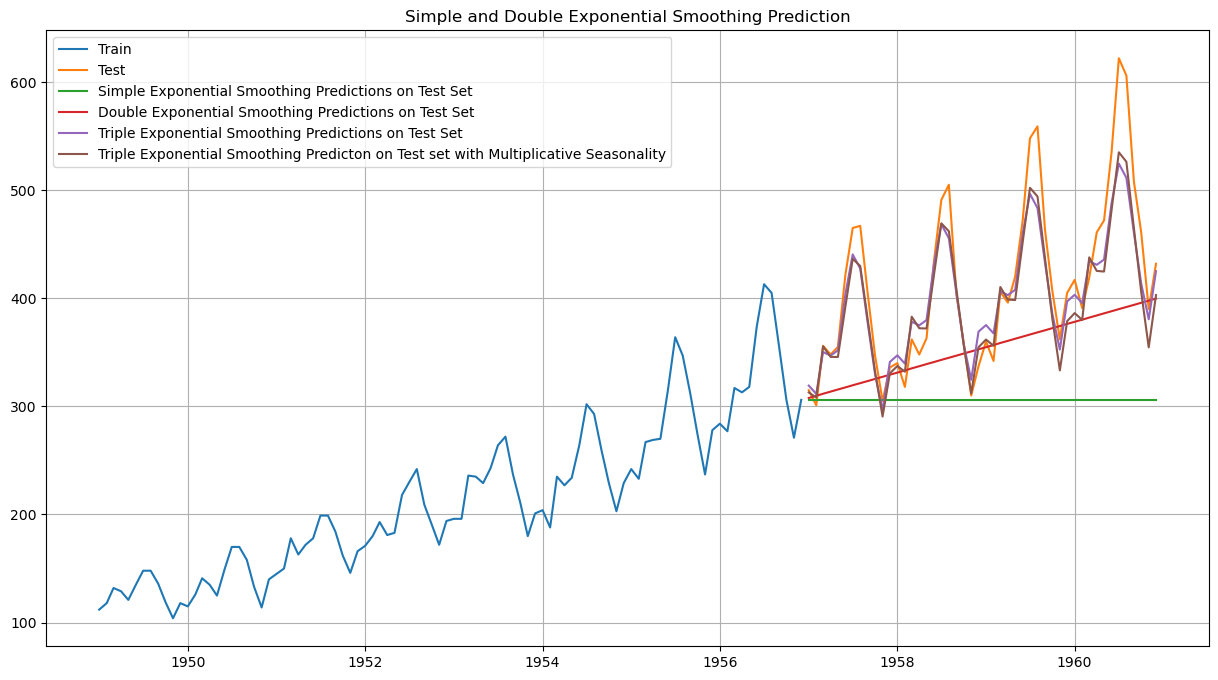

In [103]:
## Plotting the Training Data, Test DAta, and Forecast values

plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SES_predict,label='Simple Exponential Smoothing Predictions on Test Set')
plt.plot(DES_predict,label='Double Exponential Smoothing Predictions on Test Set')
plt.plot(TES_predict,label='Triple Exponential Smoothing Predictions on Test Set')
plt.plot(TES_predict_mul,label='Triple Exponential Smoothing Predicton on Test set with Multiplicative Seasonality')
plt.grid()
plt.legend(loc='best')
plt.title('Simple and Double Exponential Smoothing Prediction');


In [104]:
# RMSE value or Accuracy Report
rmse_TES_mul = mean_squared_error(test,TES_predict_mul,squared=False)
rmse_TES_mul

31.398070960327857

In [105]:
resultsDf4=pd.DataFrame({'Test RMSE':rmse_TES_mul},index=['TES'])
resultsDf4

,Test RMSE
TES,31.398071


# Final Report

In [106]:
Final_Report = pd.concat([resultsDf,resultsDf2,resultsDf3,resultsDf4])
Final_Report

,Test RMSE
"Alpha = 0.99, SES",132.609939
"Alpha = 1,Beta=0.01 DES",89.371383
"Alpha = 0.25, Beta = 2.5, Gamma = 0.74, TES",31.899966
TES,31.398071


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

# END